In [5]:
import os
import sys
parent = os.path.abspath(os.path.join('./', os.pardir))
sys.path.insert(0, parent)

from nbp_helper_funs import *
from matplotlib import pyplot as plt
% matplotlib inline


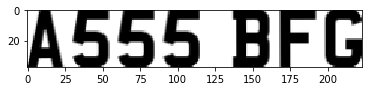

In [6]:
plate_string = 'A555 BFG'
width =  int(60*45/71)

generated_number_plate = pil2np(getPlate(plate_string, width))
plt.imshow(generated_number_plate, cmap='gray')
plt.show()

In [7]:
t = np.array(5*np.random.rand(3)).reshape(3, 1)
print(t)

alpha = 35

theta = np.radians(alpha)
c, s = np.cos(theta), np.sin(theta)
R = np.matrix('{} {} {}; {} {} {}; {} {} {}'.format(c, -s, 0, s, c, 0, 0, 0, 1))

print(R)

[[ 0.28791597]
 [ 2.6876414 ]
 [ 2.0936166 ]]
[[ 0.81915204 -0.57357644  0.        ]
 [ 0.57357644  0.81915204  0.        ]
 [ 0.          0.          1.        ]]


In [8]:
x = t

X = R@x
print(X.shape)

x_2d = X[0:-1]/X[-1]
print(x_2d)

(3, 1)
[[-0.62366759]
 [ 1.13044994]]


In [9]:
def findNewPoints(alpha, corners):
    newPoints = []
    
    t = np.array(10*np.random.rand(3)).reshape(3, 1)
    theta = np.radians(alpha)
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {} {}; {} {} {}; {} {} {}'.format(c, -s, 0, s, c, 0, 0, 0, 1))
    
    for corner in corners:
        
        x1, y1 = corner
        x = np.array([x1, y1]).reshape(2, 1)
        x = np.vstack((x, 0))
        
        X3d = R@x
        
        X3d += t
    
        
    
        x_2d = X3d[0: -1]/X3d[-1]  
        tuple_2d = np.squeeze(np.asarray(x_2d))
        
        tuple_2d = tuple(tuple_2d)
            
        newPoints.append(tuple_2d)
        
    return newPoints

corners = [(0.0, 0.0), (0.0, float(width)), (60.0, float(width)), (60.0, 0.0)]
new_P = findNewPoints(alpha=5, corners=corners)

print(corners)
print(new_P)


[(0.0, 0.0), (0.0, 38.0), (60.0, 38.0), (60.0, 0.0)]
[(0.54932966683137852, 1.0638402881732849), (0.17956491494942611, 5.2902707419015726), (6.8528761576783017, 5.8741098238204446), (7.2226409095602548, 1.6476793700921573)]


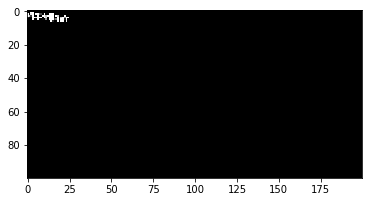

In [11]:

im = np2pil(generated_number_plate)

coeffs = getTransformCoeffs(corners, new_P)
im = im.transform((200,100), Image.PERSPECTIVE, coeffs, Image.BICUBIC)

plt.imshow(im, cmap='gray')
plt.show()
